# 4장 셀프 주유소는 정말 저렴할까

### 작성 : [PinkWink](http://pinkwink.kr) 

## 4-1 Selenium 사용하기

In [13]:
from selenium import webdriver

* 현재 최신 크롬드라이버의 명령 중 일부가 다른 버전과 다른듯 합니다. 본 Github에서 배포하는 driver를 사용하시기 바랍니다.

In [14]:
driver = webdriver.Chrome('../driver/chromedriver') # 드라이버 부르기
driver.get("http://naver.com") # 웹 사이트 오픈 

In [15]:
driver.save_screenshot('../images/001.png') # 캡처(스크린샷),images  폴더에 이미지를 저장함 

True

In [16]:
driver.close() # 드라이버는 항상 쓰고난 다음에 닫아줘야함 (열려있는 인터넷 창도 닫힘)

In [4]:
# 네이버 로그인 

elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("pinkwink")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys(" ************ ") #자신의 비번을 넣으세요

In [5]:
xpath = """//*[@id="frmNIDLogin"]/fieldset/span/input"""
driver.find_element_by_xpath(xpath).click()

In [6]:
driver.get("http://mail.naver.com")

In [7]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [8]:
raw_list = soup.find_all('div', 'name _ccr(lst.from) ')
raw_list

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7025) _stopDefault" href="#" title='"에브리존" &lt;mail1@everyzone.com&gt;'>에브리존</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7024) _stopDefault" href="#" title='"에브리존" &lt;mail1@everyzone.com&gt;'>에브리존</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7020) _stopDefault" href="#" title='"에브리존" &lt;mail1@everyzone.com&gt;'>에브리존</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7017) _stopDefault" href="#" title='"에브리존" &lt;mail1@everyzone.com&gt;'>에브리존</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7016) _stopDefault" href="#" titl

In [9]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['에브리존',
 '에브리존',
 '에브리존',
 '에브리존',
 '에브리존',
 '에브리존',
 '에브리존',
 '에브리존',
 '반려동물관리사',
 '에브리존',
 '에브리존',
 '에브리존',
 '중소기업제도홍보센..',
 '에브리존',
 '에브리존']

In [10]:
driver.close()

## 4-2 서울시 구별 주유소 가격 정보 얻기

In [85]:
driver = webdriver.Chrome('../driver/chromedriver') # 드라이버 부르기
driver.get("http://www.opinet.co.kr/searRgSelect.do")  # 웹 사이트 오픈 (제어당하고 있는 웹)

* Opinet은 사용자가 접속한 지역에 따라 지역을 잡아주는 기능이 있습니다.
* 이 기능을 배려하지 않고 코드가 짜여졌습니다.

<img src="../img/001.JPG"></img>

* 지역에 **서울**이라고 나타나지 않으면 크롬 드라이버에서 손으로 **서울**로 잡아주세요.

In [83]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""") 
# //*[@id="SIGUNGU_NM"] <= 얘는 웹 요소에서 xpath로 가져오는거, """ (여기)""" <- 안에 넣어야함 

gu_list = gu_list_raw.find_elements_by_tag_name("option")



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="SIGUNGU_NM0"]"}
  (Session info: chrome=90.0.4430.212)


In [84]:
gu_names = [option.get_attribute("value") for option in gu_list] # gu_list에 있는 option(값)만 가져오겠다
gu_names.remove('') # '' <-- 얘 제외해라 
gu_names

InvalidSessionIdException: Message: invalid session id


In [25]:
element = driver.find_element_by_id("SIGUNGU_NM0") 
element.send_keys(gu_names[2]) # 제어웹 상에서 숫자에 따라 구가 바뀜 

In [26]:
xpath = """//*[@id="searRgSelect"]""" 
element_sel_gu = driver.find_element_by_xpath(xpath).click() # 조회에 클릭 갈기기



In [23]:
xpath = """//*[@id="glopopd_excel"]""" 
# //*[@id="glopopd_excel"] <-얘는 제어웹 요소에서 xpath로 가져오는거, """ (여기)""" <- 안에 넣어야함 
element_get_excel = driver.find_element_by_xpath(xpath).click() # 엑셀 다운로드에 클릭 갈기기


In [27]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names): # gu_names이 들어오면 반복하여 gu에 넣는다 
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2) # 2초동안 잠재워라 
    
    xpath = """//*[@id="searRgSelect"]""" 
    element_sel_gu = driver.find_element_by_xpath(xpath).click() # 조회, 클릭 
    
    time.sleep(1) # 1초동안 잠재워라 
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1) # 1초동안 잠재워라 
    
# xpath = 그릇같은 변수 (for문 안에서) 

In [32]:
driver.close() # 드라이버는 꼭 닫아줘야함 

InvalidSessionIdException: Message: invalid session id


## 4-5. 구별 주유 가격에 대한 데이터의 정리

In [39]:
import pandas as pd
from glob import glob

In [52]:
glob('../data/지역*xls')

[]

In [53]:
stations_files = glob('../data/지역*xls')
stations_files


['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [54]:
tmp_raw = []

for file_name in stations_files: # stations_files = 지역 엑셀 데이터 를  for문 돌려서 file_name여기에 넣어라 
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [57]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 45
Data columns (total 10 columns):
지역       537 non-null object
상호       537 non-null object
주소       537 non-null object
상표       537 non-null object
전화번호     537 non-null object
셀프여부     537 non-null object
고급휘발유    537 non-null object
휘발유      537 non-null object
경유       537 non-null object
실내등유     537 non-null object
dtypes: object(10)
memory usage: 46.1+ KB


In [56]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-


In [59]:
# 휘발유만 대상

stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                         # 데이터의 상호 컬럼에 있는 데이터를 가지고와서 Oil_store 에 넣어라 데이터 프레임화 해서. 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스


In [63]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [64]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [12]:
stations[stations['구']=='서울특별시']

,Oil_store,가격,상표,셀프,주소,구
12,SK네트웍스(주)효진주유소,1654,SK에너지,N,1 서울특별시 성동구 동일로 129 (성수동2가),서울특별시


In [66]:
# 데이터 정제 

stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique() # unique() = 이상한 데이터 찾아내기 

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [68]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구
10,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1524,Y,S-OIL,특별시


In [69]:
stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [16]:
stations[stations['가격']=='-'] # stations 칼럽의 가격을 '-' 로 바꿔라 

,Oil_store,가격,상표,셀프,주소,구
18,명진석유(주)동서울주유소,-,GS칼텍스,Y,서울특별시 강동구 천호대로 1456 (상일동),강동구
33,하나주유소,-,S-OIL,N,서울특별시 영등포구 도림로 236 (신길동),영등포구
12,(주)에이앤이청담주유소,-,SK에너지,Y,서울특별시 강북구 도봉로 155 (미아동),강북구
13,송정주유소,-,자가상표,N,서울특별시 강북구 인수봉로 185 (수유동),강북구


In [71]:
stations = stations[stations['가격'] != '-'] # 가격이 없는거 제외 
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [72]:
stations['가격'] = [float(value) for value in stations['가격']]

In [73]:
stations.reset_index(inplace=True)
del stations['index']

In [74]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
Oil_store    533 non-null object
주소           533 non-null object
가격           533 non-null float64
셀프           533 non-null object
상표           533 non-null object
구            533 non-null object
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


In [75]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554.0,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556.0,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559.0,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578.0,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588.0,Y,GS칼텍스,강동구


## 4-4 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

#폰트 설정. 카피해서 쓰기 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

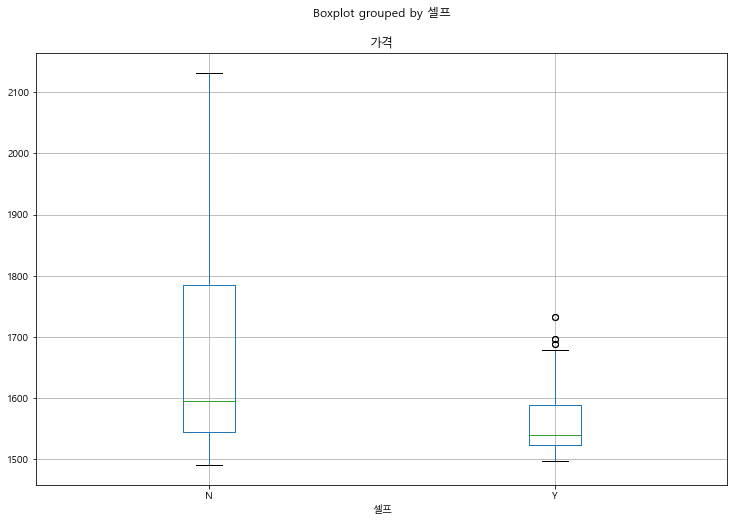

In [77]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

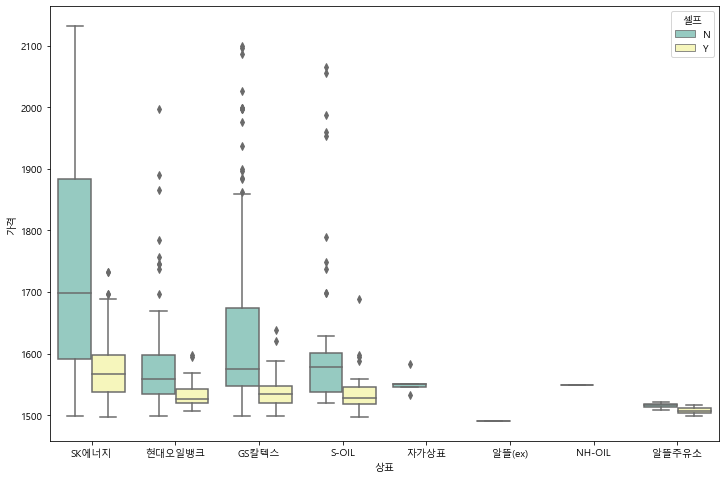

In [78]:
plt.figure(figsize=(12,8)) # 그래프 사이즈 
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

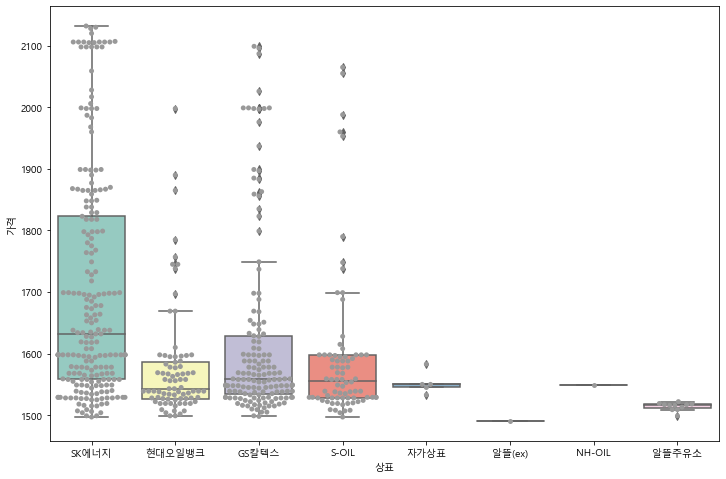

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

## 4-5 서울시 구별 주유 가격 확인하기

In [26]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [27]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,가격,상표,셀프,주소,구
325,서남주유소,2132.0,SK에너지,N,서울 중구 통일로 30 (봉래동1가),중구
324,장충주유소,2130.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구
124,양재주유소,2128.0,SK에너지,N,서울 서초구 바우뫼로 178 (양재동),서초구
532,뉴서울(강남),2120.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구
531,오천주유소,2107.0,SK에너지,N,서울 강남구 봉은사로 503 (삼성동),강남구
313,재동주유소,2106.0,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동),종로구
285,청파주유소,2106.0,SK에너지,N,서울특별시 용산구 청파로 311 (청파동1가),용산구
284,갈월동주유소,2106.0,SK에너지,N,서울특별시 용산구 한강대로 322 (갈월동),용산구
283,강변주유소,2106.0,SK에너지,N,서울특별시 용산구 원효로 9 (청암동),용산구
323,통일주유소,2106.0,SK에너지,N,서울 중구 동호로 296 (장충동2가),중구


In [28]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,가격,상표,셀프,주소,구
83,만남의광장주유소,1490.0,알뜰(ex),N,서울 서초구 양재대로12길 73-71 (원지동),서초구
344,강서오곡셀프주유소,1497.0,SK에너지,Y,서울특별시 강서구 벌말로 254 (오곡동),강서구
451,태릉솔밭주유소,1497.0,S-OIL,Y,서울특별시 노원구 노원로 49 (공릉동),노원구
258,수유동주유소,1498.0,GS칼텍스,Y,서울특별시 강북구 도봉로 395 (수유동),강북구
227,(주)강서오일,1499.0,현대오일뱅크,N,서울 영등포구 도신로 151 (도림동),영등포구
225,도림주유소,1499.0,알뜰주유소,Y,서울 영등포구 도림로 343 (도림동),영등포구
226,(주)대청에너지 대청주유소,1499.0,GS칼텍스,N,서울 영등포구 가마산로 328 (대림동),영등포구
415,풀페이주유소,1499.0,SK에너지,N,서울특별시 구로구 경인로 41 (온수동),구로구
326,신일셀프주유소,1499.0,SK에너지,Y,서울 중랑구 상봉로 58 (망우동),중랑구
40,서경주유소,1499.0,현대오일뱅크,N,서울 동작구 대림로 46 (신대방동),동작구


In [29]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1791.000000
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556


In [30]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

## 4-6 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [31]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구
325,서남주유소,2132.0,SK에너지,N,서울 중구 통일로 30 (봉래동1가),중구
324,장충주유소,2130.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구
124,양재주유소,2128.0,SK에너지,N,서울 서초구 바우뫼로 178 (양재동),서초구
532,뉴서울(강남),2120.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구
531,오천주유소,2107.0,SK에너지,N,서울 강남구 봉은사로 503 (삼성동),강남구
313,재동주유소,2106.0,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동),종로구
285,청파주유소,2106.0,SK에너지,N,서울특별시 용산구 청파로 311 (청파동1가),용산구
284,갈월동주유소,2106.0,SK에너지,N,서울특별시 용산구 한강대로 322 (갈월동),용산구
283,강변주유소,2106.0,SK에너지,N,서울특별시 용산구 원효로 9 (청암동),용산구
323,통일주유소,2106.0,SK에너지,N,서울 중구 동호로 296 (장충동2가),중구


In [32]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구
83,만남의광장주유소,1490.0,알뜰(ex),N,서울 서초구 양재대로12길 73-71 (원지동),서초구
344,강서오곡셀프주유소,1497.0,SK에너지,Y,서울특별시 강서구 벌말로 254 (오곡동),강서구
451,태릉솔밭주유소,1497.0,S-OIL,Y,서울특별시 노원구 노원로 49 (공릉동),노원구
258,수유동주유소,1498.0,GS칼텍스,Y,서울특별시 강북구 도봉로 395 (수유동),강북구
227,(주)강서오일,1499.0,현대오일뱅크,N,서울 영등포구 도신로 151 (도림동),영등포구
225,도림주유소,1499.0,알뜰주유소,Y,서울 영등포구 도림로 343 (도림동),영등포구
226,(주)대청에너지 대청주유소,1499.0,GS칼텍스,N,서울 영등포구 가마산로 328 (대림동),영등포구
415,풀페이주유소,1499.0,SK에너지,N,서울특별시 구로구 경인로 41 (온수동),구로구
326,신일셀프주유소,1499.0,SK에너지,Y,서울 중랑구 상봉로 58 (망우동),중랑구
40,서경주유소,1499.0,현대오일뱅크,N,서울 동작구 대림로 46 (신대방동),동작구


In [35]:
gmap_key = "***************************************" # 2장에서 구한 자신의 key를 입력
gmaps = googlemaps.Client(key=gmap_key)

In [36]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

,Oil_store,가격,상표,셀프,주소,구,lat,lng
325,서남주유소,2132.0,SK에너지,N,서울 중구 통일로 30 (봉래동1가),중구,37.558348,126.972090
324,장충주유소,2130.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),중구,37.562719,127.007010
124,양재주유소,2128.0,SK에너지,N,서울 서초구 바우뫼로 178 (양재동),서초구,37.478071,127.039610
532,뉴서울(강남),2120.0,SK에너지,N,서울 강남구 언주로 716 (논현동),강남구,37.517636,127.035756
531,오천주유소,2107.0,SK에너지,N,서울 강남구 봉은사로 503 (삼성동),강남구,37.513458,127.053786
313,재동주유소,2106.0,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동),종로구,37.576388,126.985851
285,청파주유소,2106.0,SK에너지,N,서울특별시 용산구 청파로 311 (청파동1가),용산구,37.547451,126.969904
284,갈월동주유소,2106.0,SK에너지,N,서울특별시 용산구 한강대로 322 (갈월동),용산구,37.546955,126.972218
283,강변주유소,2106.0,SK에너지,N,서울특별시 용산구 원효로 9 (청암동),용산구,37.534910,126.945869
323,통일주유소,2106.0,SK에너지,N,서울 중구 동호로 296 (장충동2가),중구,37.560714,127.003177


In [37]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

,Oil_store,가격,상표,셀프,주소,구,lat,lng
83,만남의광장주유소,1490.0,알뜰(ex),N,서울 서초구 양재대로12길 73-71 (원지동),서초구,37.459906,127.042060
344,강서오곡셀프주유소,1497.0,SK에너지,Y,서울특별시 강서구 벌말로 254 (오곡동),강서구,37.555284,126.768567
451,태릉솔밭주유소,1497.0,S-OIL,Y,서울특별시 노원구 노원로 49 (공릉동),노원구,37.625918,127.085533
258,수유동주유소,1498.0,GS칼텍스,Y,서울특별시 강북구 도봉로 395 (수유동),강북구,37.642140,127.029568
227,(주)강서오일,1499.0,현대오일뱅크,N,서울 영등포구 도신로 151 (도림동),영등포구,37.509969,126.908231
225,도림주유소,1499.0,알뜰주유소,Y,서울 영등포구 도림로 343 (도림동),영등포구,37.507656,126.900191
226,(주)대청에너지 대청주유소,1499.0,GS칼텍스,N,서울 영등포구 가마산로 328 (대림동),영등포구,37.498556,126.895791
415,풀페이주유소,1499.0,SK에너지,N,서울특별시 구로구 경인로 41 (온수동),구로구,37.491009,126.826675
326,신일셀프주유소,1499.0,SK에너지,Y,서울 중랑구 상봉로 58 (망우동),중랑구,37.590907,127.093834
40,서경주유소,1499.0,현대오일뱅크,N,서울 동작구 대림로 46 (신대방동),동작구,37.487947,126.908240


In [38]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map